In [652]:
import pandas as pd
import numpy as np

In [653]:
df=pd.read_csv('D:/practices/bigdatamart_Train.csv')

In [654]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [655]:
from sklearn import preprocessing

In [656]:
le=preprocessing.LabelEncoder()

In [657]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Fat_Content']

0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int32

In [658]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [659]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [660]:
df['Item_Weight']=df['Item_Weight'].fillna((df['Item_Weight']))

In [661]:
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df=df_most_common_imputed

In [662]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [663]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [664]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Finding the correlation 

In [665]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017103,-0.017843,0.028041,0.025258,-0.007118,0.035689,-0.016294,-0.001756,-0.026358,0.006443
Item_Fat_Content,-0.017103,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.017843,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028041,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.025258,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007118,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,0.035689,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.016294,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,-0.001756,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.026358,-0.004214,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.201483,0.467219,1.000000,0.401522


In [666]:
import matplotlib.pyplot as plt
import seaborn as sns

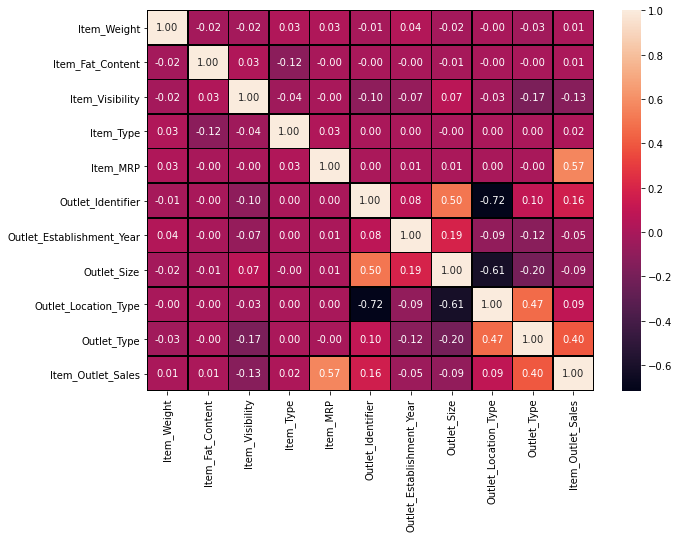

In [667]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

As the threshold of correlation is 0-1, we can see how weak and strong are the variables with the target variables.The Columns Item visibility,outlet estabilished year and outlet type are weakly correlated

Outlier visualization

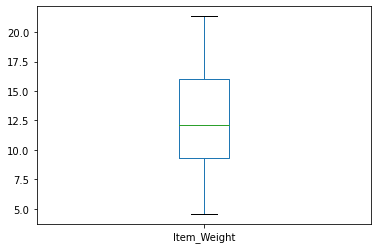

In [668]:
df['Item_Weight'].plot.box()

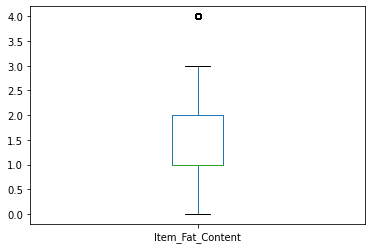

In [669]:
df['Item_Fat_Content'].plot.box()

There is one outlierin Itemfatcontent

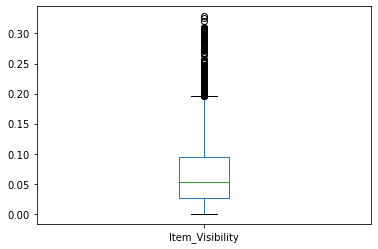

In [670]:
df['Item_Visibility'].plot.box()

we can observe there are many outliers in item visibility

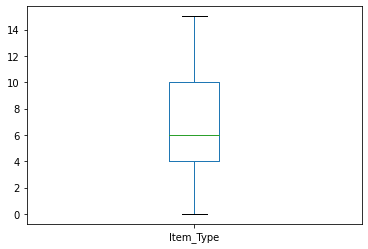

In [671]:
df['Item_Type'].plot.box()

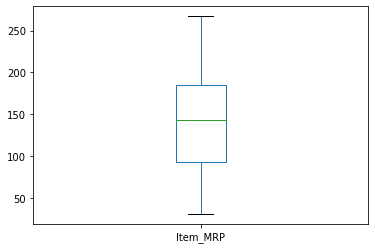

In [672]:
df['Item_MRP'].plot.box()

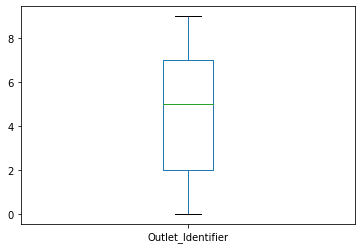

In [673]:
df['Outlet_Identifier'].plot.box()

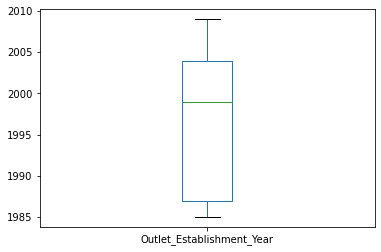

In [674]:
df['Outlet_Establishment_Year'].plot.box()

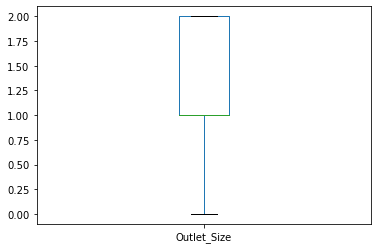

In [675]:
df['Outlet_Size'].plot.box()

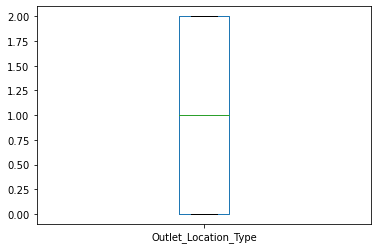

In [676]:
df['Outlet_Location_Type'].plot.box()

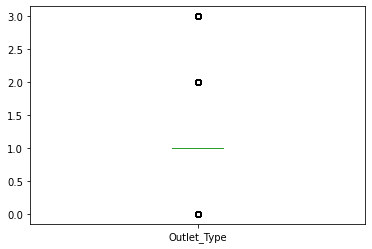

In [677]:
df['Outlet_Type'].plot.box()

There are few outliers in outlet type

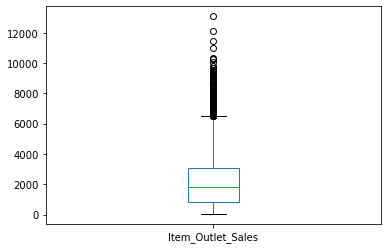

In [678]:
df['Item_Outlet_Sales'].plot.box()

There are many outliers in item outlet sales

Checking skewness of data

In [679]:
df.skew()

Item_Weight                  0.175321
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Data Cleaning:

Dropping The column Data Visibility because it has less correlation (-0.13) and not has a normalised curve with many outliers.We can also drop unique identifier value Item_Identifier

In [680]:
df=df.drop(["Item_Visibility","Item_Identifier"],axis=1)

In [681]:
df

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920,2,14,48.2692,3,2009,1,2,2,443.4228
2,17.500,1,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200,2,6,182.0950,0,1998,1,2,0,732.3800
4,8.930,1,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,13,214.5218,1,1987,0,2,1,2778.3834
8519,8.380,2,0,108.1570,7,2002,1,1,1,549.2850
8520,10.600,1,8,85.1224,6,2004,2,1,1,1193.1136
8521,7.210,2,13,103.1332,3,2009,1,2,2,1845.5976


Removing Outliers through Zscore Method

In [682]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8523, 10)

In [683]:
threshold=3
print(np.where(z>3))

(array([  81,  130,  145,  151,  199,  276,  304,  333,  339,  373,  396,
        456,  472,  489,  615,  661,  694,  727,  753,  753,  809,  838,
        891,  935,  991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138,
       1183, 1209, 1254, 1372, 1433, 1450, 1506, 1512, 1542, 1549, 1576,
       1615, 1617, 1684, 1723, 1753, 1769, 1859, 1998, 2062, 2109, 2111,
       2143, 2168, 2173, 2216, 2223, 2238, 2293, 2331, 2438, 2516, 2535,
       2552, 2569, 2660, 2678, 2776, 2905, 2971, 2973, 3011, 3083, 3087,
       3098, 3154, 3225, 3234, 3241, 3242, 3243, 3286, 3335, 3367, 3407,
       3480, 3491, 3509, 3545, 3582, 3602, 3667, 3709, 3720, 3757, 4019,
       4083, 4163, 4245, 4289, 4290, 4346, 4349, 4393, 4415, 4463, 4676,
       4680, 4681, 4772, 4865, 4888, 4961, 4991, 5047, 5054, 5065, 5133,
       5146, 5177, 5185, 5202, 5223, 5315, 5401, 5417, 5467, 5500, 5539,
       5550, 5577, 5611, 5619, 5633, 5752, 5784, 5799, 5812, 5977, 6000,
       6132, 6134, 6176, 6268, 6334, 6344, 6357, 6

In [684]:
df_new=df[(z<3).all(axis=1)]

In [685]:
df_new.shape

(8317, 10)

In [686]:
loss_percent=(8523-8317)/8523*100
print(loss_percent)

2.4169893230083304


In [687]:
x=df_new.iloc[:,:-1]

In [688]:
x

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,4,249.8092,9,1999,1,0,1
1,5.920,2,14,48.2692,3,2009,1,2,2
2,17.500,1,10,141.6180,9,1999,1,0,1
3,19.200,2,6,182.0950,0,1998,1,2,0
4,8.930,1,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,13,214.5218,1,1987,0,2,1
8519,8.380,2,0,108.1570,7,2002,1,1,1
8520,10.600,1,8,85.1224,6,2004,2,1,1
8521,7.210,2,13,103.1332,3,2009,1,2,2


In [689]:
y=df_new.iloc[:,-1]
y.shape

(8317,)

In [690]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [691]:
x_train.shape

(6653, 9)

In [692]:
y_train.shape

(6653,)

In [693]:
x_test.shape

(1664, 9)

In [694]:
y_test.shape

(1664,)

In [695]:
y.shape

(8317,)

In [696]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\SAI\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\SAI\anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [697]:
x

array([[-0.78147377, -0.55363648, -0.71524187, ..., -0.29682791,
        -1.36984609, -0.11300346],
       [-1.73933478,  1.15831947,  1.50742282, ..., -0.29682791,
         1.09379863,  1.06068803],
       [ 1.10409409, -0.55363648,  0.68388995, ..., -0.29682791,
        -1.36984609, -0.11300346],
       ...,
       [-0.44918897, -0.55363648,  0.24525202, ...,  1.38305374,
        -0.12048128, -0.11300346],
       [-1.35480146,  1.15831947,  1.30717382, ..., -0.29682791,
         1.09379863,  1.06068803],
       [ 0.53100384, -0.55363648,  1.50742282, ...,  1.38305374,
        -1.36984609, -0.11300346]])

In [698]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8317, dtype: float64

In [699]:
from sklearn.preprocessing import StandardScaler

In [700]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [701]:
x

array([[-0.78147377, -0.55363648, -0.71524187, ..., -0.29682791,
        -1.36984609, -0.11300346],
       [-1.73933478,  1.15831947,  1.50742282, ..., -0.29682791,
         1.09379863,  1.06068803],
       [ 1.10409409, -0.55363648,  0.68388995, ..., -0.29682791,
        -1.36984609, -0.11300346],
       ...,
       [-0.44918897, -0.55363648,  0.24525202, ...,  1.38305374,
        -0.12048128, -0.11300346],
       [-1.35480146,  1.15831947,  1.30717382, ..., -0.29682791,
         1.09379863,  1.06068803],
       [ 0.53100384, -0.55363648,  1.50742282, ...,  1.38305374,
        -1.36984609, -0.11300346]])

In [702]:
x.shape

(8317, 9)

In [703]:
y.shape

(8317,)

In [704]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print("predicted",pred)
print("actual",y_test)
print("r2_score",r2_score(y_test,pred))
print("meansquarederror",mean_squared_error(y_test,pred))
print("meanabsoluteerror",mean_absolute_error(y_test,pred))

predicted [-342.48384785  701.8124557  3415.90774841 ... 3809.58177847 1998.20804915
 1360.17678095]
actual 7585      49.9350
755      669.1290
7732    5635.3312
5730     649.8208
2378    3205.1612
          ...    
5587    1231.7300
7890    2554.0088
7252    4161.2500
3230    1416.8224
2888    2167.1790
Name: Item_Outlet_Sales, Length: 1664, dtype: float64
r2_score 0.5062161195650035
meansquarederror 1289408.8752077904
meanabsoluteerror 870.9586864937045


In [706]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()

In [707]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc))

0.23663639627625532


In [709]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))
    pred_y=sv.predict(x_test)
    print(r2_score(y_test,pred_y))

0.47427080181292913
0.47662297838734147
-0.03674894794775496
-0.04035744245597184
-0.0431155224295392
-0.046527009944662634


KNearest Neighbours

In [710]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)

In [711]:
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))

0.6615554615864292


In [712]:
pred_y=knr.predict(x_test)
print(r2_score(y_test,pred_y))

0.5131841847758489


Ensemble Techniques:

In [713]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)

In [714]:
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))

0.6215584852779537


In [715]:
pred_y=gbr.predict(x_test)
print(r2_score(y_test,pred_y))

0.600200418086809


In [716]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=100)
ada.fit(x_train,y_train)
print(ada.score(x_train,y_train))

0.5757990178778283


In [717]:
pred_y=ada.predict(x_test)
print(r2_score(y_test,pred_y))

0.5866668397229369


In [718]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))

0.9351228095320964


In [719]:
pred_y=rfr.predict(x_test)
print(r2_score(y_test,pred_y))

0.5525236251107768


Regularization

In [720]:
from sklearn.linear_model import Lasso,Ridge

In [721]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.499346011062032

In [722]:
ls.coef_

array([ 3.55838557e-01,  4.75157930e+01,  4.88384879e-02,  1.45506784e+01,
        6.35229086e+01,  4.41550408e+00, -3.89127812e+02, -2.23059261e+02,
        8.14527395e+02])

In [723]:
pred_y=ls.predict(x_test)
r2_score(y_test,pred_y)

0.506216121871482

In [724]:
rs=Ridge(alpha=0.0001)
rs.fit(x_train,y_train)
rs.score(x_train,y_train)

0.49934601106215615

In [725]:
pred_y=rs.predict(x_test)
r2_score(y_test,pred_y)

0.5062161194970966

Cross validation scores

In [741]:
from sklearn.model_selection import cross_val_score

#linearRegression
pred_y=lr.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(lr,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.5171673614628537
r2_score is  0.5062161195650035




In [734]:
#Gradient Boost
pred_y=gbr.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(gbr,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.5893146775234447
r2_score is  0.600200418086809




In [736]:
#Random Forest Regressor
pred_y=rfr.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(rfr,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.5313876164769423
r2_score is  0.5525236251107768




In [737]:
#DecisionTreeRegressor
pred_y=dtc.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(dtc,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.161359790040633
r2_score is  0.23663639627625532




In [742]:
#Support Vector Regressor
pred_=svr.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(svr,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.08726745816299053
r2_score is  0.5062161195650035




In [743]:
#AdaBoost
pred_=ada.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(ada,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.5597165204129904
r2_score is  0.5062161195650035




In [744]:
#knearestneighborsregressor
pred_y=knr.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(knr,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.5037665150511883
r2_score is  0.5131841847758489




In [745]:
#lassoRegressor
pred_=ls.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(ls,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

cross validation score is: 0.5171673639930079
r2_score is  0.5131841847758489




#RidgeRegressor
pred_=rs.predict(x_test)
lss = r2_score(y_test,pred_y)
lsscore =cross_val_score(rs,x,y,cv=5)
lsc = lsscore.mean()
print("cross validation score is:",lsc)
print("r2_score is ",lss)
print("\n")

Conclusion:
    Comparing all the models The GradientBoosting Model has a better performance on data. So saving the model into the file

In [749]:
import pickle
filename= 'bigdatamart.pkl'
pickle.dump(lr,open(filename,'wb'))

In [726]:
y.array.reshape(-1,1)

AttributeError: 'PandasArray' object has no attribute 'reshape'